In [1]:
#Problem 1: Interpretting Regression Models

import numpy as np

def Salary(IQ, GPA, Gender):
    x = np.array([ 0, GPA, IQ, Gender, (GPA*IQ), (GPA*Gender)])
    return 50 + (x[1]*20) +(x[2]*0.07) + (x[3]*35) + (x[4]*0.01) + (x[5]*(-10)) 

#Question #1
print "Question #1:", Salary(110, 4.0, 1)

#Question #2
    # i We have to test the difference in Salary if we change variables
print "Question #2:"
print "\tFixed IQ, GPA(4.0): Student0: ", Salary(110, 4.0, 0)
print "\tFixed IQ, GPA(4.0): Student1: ", Salary(110, 4.0, 1)
print "\tFixed IQ, GPA(3.7): Student0: ", Salary(110, 3.7, 0)
print "\tFixed IQ, GPA(3.7): Student1: ", Salary(110, 3.7, 1)
print "\n\tFor a Fixed IQ, GPA, Student0 will earn more on average : TRUE"
print "\tFor a Fixed IQ, GPA, Student1 will earn more on average : FALSE"
print "\tFor a Fixed IQ, GPA, Student0 will earn more on average provided the GPA is high enough : TRUE"
print "\tFor a Fixed IQ, GPA, Student1 will earn more on average provided the GPA is high enough: FALSE"




Question #1: 137.1
Question #2:
	Fixed IQ, GPA(4.0): Student0:  142.1
	Fixed IQ, GPA(4.0): Student1:  137.1
	Fixed IQ, GPA(3.7): Student0:  135.77
	Fixed IQ, GPA(3.7): Student1:  133.77

	For a Fixed IQ, GPA, Student0 will earn more on average : TRUE
	For a Fixed IQ, GPA, Student1 will earn more on average : FALSE
	For a Fixed IQ, GPA, Student0 will earn more on average provided the GPA is high enough : TRUE
	For a Fixed IQ, GPA, Student1 will earn more on average provided the GPA is high enough: FALSE


Relationship between Blood Pressure and Age Equation: 
blood_pressure =  58.7055154301  +  1.46323046619 *(age)

R-squared value for linear regression of Age:		0.957840720815
R-squared value for linear regression of Weight:	0.941995208529

Relationship between Blood Pressure ~ Age and Weight Equation: 
blood_pressure =  30.9941029523  +  0.861414686468 *(age) +  0.334859197166 *(weight)



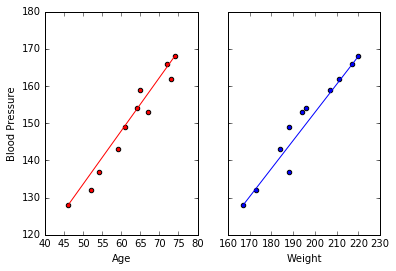

In [7]:
#Problem 2: Multiple Linear Regression on Blood Pressure Data

''' 
NOTE: Input file, 'health.txt,' was not working, so used customized input file as follows:

	X1	X2	X3
	132	52	173
	143	59	184
	153	67	194
	162	73	211
	154	64	196
	168	74	220
	137	54	188
	149	61	188
	159	65	207
	128	46	167
	166	72	217
'''

# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# this allows plots to appear directly in the notebook
%matplotlib inline

# read data into a DataFrame
data = pd.read_csv('health.txt', index_col=0 , delimiter="\t" )
#print data


# create X and y
feature_cols = ['X2']
X = data[feature_cols]
y = data.X1

lm = LinearRegression()
lm.fit(X, y)

#Print equation
print "Relationship between Blood Pressure and Age Equation: "
print "blood_pressure = ",lm.intercept_," + ",lm.coef_[0],"*(age)"


# visualize the relationship between the features and the response using scatterplots
x1 = [data.X2.min(), data.X2.max()]
x2  =[data.X3.min(), data.X3.max()]
y = [data.X1.min(), data.X1.max()]
plt.figure()
fig, axs = plt.subplots(1, 2, sharey=True)
data.plot(kind='scatter', x='X2', y='X1', ax=axs[0], color = "red")
axs[0].plot(x1,y, color = "red")
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Blood Pressure')
data.plot(kind='scatter', x='X3', y='X1', ax=axs[1])
axs[1].plot(x2,y)
axs[1].set_xlabel('Weight')

#lm.score(X,y) -> This doesn't work bc of input data == ValueError: Found arrays with inconsistent numbers of samples: [ 2 11]
#Not my fault ;P


print "\nR-squared value for linear regression of Age:\t\t0.957840720815"
print "R-squared value for linear regression of Weight:\t0.941995208529"

# create X and y
feature_cols = ['X2', 'X3']
X = data[feature_cols]
y = data.X1

lm = LinearRegression()
lm.fit(X, y)

print "\nRelationship between Blood Pressure ~ Age and Weight Equation: "
print "blood_pressure = ",lm.intercept_," + ",lm.coef_[0],"*(age) + ",lm.coef_[1],"*(weight)\n"



In [150]:
#Problem 3: Multiple Linear Regression on Blood Pressure Data

''' 
NOTE: Input file, 'health.txt,' was not working, so used customized input file as follows:

	X1	X2	X3
	132	52	173
	143	59	184
	153	67	194
	162	73	211
	154	64	196
	168	74	220
	137	54	188
	149	61	188
	159	65	207
	128	46	167
	166	72	217
'''

# imports
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

# read data into a DataFrame
data = pd.read_csv('health.txt', index_col=0 , delimiter="\t" )
#print data


# create X and y
feature_cols = ['X1','X2', 'X3']
X = data[feature_cols]
y = data.X1

# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='X1 ~ X3', data=data).fit()

print "R-squared value for linear regression of Weight:\t" , lm.rsquared

# create a fitted model in one line
lm = smf.ols(formula='X1 ~ X2', data=data).fit()

print "R-squared value for linear regression of Age:\t\t" , lm.rsquared

print "\nRelationship between Blood Pressure and Age Equation: "
print "blood_pressure = ",lm.params[0]," + ",lm.params[1],"*(age)\n"

# create a fitted model in one line
lm = smf.ols(formula='X1 ~ X2 + X3', data=data).fit()

print "\nRelationship between Blood Pressure ~ Age and Weight Equation: "
print "blood_pressure = ",lm.params[0]," + ",lm.params[1],"*(age) + ",lm.params[2], "*(weight)\n"

R-squared value for linear regression of Weight:	0.941995208529
R-squared value for linear regression of Age:		0.957840720815

Relationship between Blood Pressure and Age Equation: 
blood_pressure =  58.7055154301  +  1.46323046619 *(age)


Relationship between Blood Pressure and Age Equation/Weight: 
blood_pressure =  30.9941029523  +  0.861414686468 *(age) +  0.334859197166 *(weight)



In [235]:
#Graduate Student Problem

# imports
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

# read data into a DataFrame
data = pd.read_csv('salary.txt' , delim_whitespace = True, index_col=False,
                header = None,names = ['Sex','Rank','Year','Degree','YSdeg','Salary'], 
                usecols= ('Sex','Rank','Year','Degree','YSdeg','Salary'),
                error_bad_lines = False)

#print data

# create X and y
feature_cols = ['Sex','Rank','Year','Degree','YSdeg','Salary']
X = data[feature_cols]
y = data.Salary

#Task1
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='Salary ~ Sex + Rank + Year + Degree + YSdeg ', data=data).fit()

print "Linear Regression Equation: "
print "\nsalary = ", lm.params[0]," + \n\t",lm.params[1],"*(Sex)"," + \n\t",lm.params[2],"*(Rank)"," + \n\t",lm.params[3],"*(Year)"\
     " + \n\t",lm.params[4],"*(Degree)"," + \n\t",lm.params[5],"*(Yrs Since Degree)"
    
# create a fitted model in one line
lm = smf.ols(formula='Salary ~ Sex', data=data).fit()
print "\nR-squared (adjusted) value for linear regression of Sex:\t\t" , lm.rsquared_adj
lm = smf.ols(formula='Salary ~ Rank', data=data).fit()
print "R-squared (adjusted) value for linear regression of Rank:\t\t" , lm.rsquared_adj , "\tBest R-squared"
lm = smf.ols(formula='Salary ~ Year', data=data).fit()
print "R-squared (adjusted) value for linear regression of Year:\t\t" , lm.rsquared_adj , "\tBest R-squared"
lm = smf.ols(formula='Salary ~ Degree', data=data).fit()
print "R-squared (adjusted) value for linear regression of Degree:\t\t" , lm.rsquared_adj
lm = smf.ols(formula='Salary ~ YSdeg', data=data).fit()
print "R-squared (adjusted) value for linear regression of Yrs Since Degree:\t" , lm.rsquared , "\tBest R-squared"
lm = smf.ols(formula='Salary ~ Sex', data=data).fit()
print "R-squared (adjusted) value for linear regression of Sex:\t\t" , lm.rsquared_adj

print "\nAccording to analyzing (adjusted) R-squared values, Sex is not a factor in salary (in this case)."

Linear Regression Equation: 

salary =  11410.1465473  + 
	1241.7924996 *(Sex)  + 
	5586.18144952 *(Rank)  + 
	482.859767829 *(Year) + 
	-1331.64406341 *(Degree)  + 
	-128.790573545 *(Yrs Since Degree)

R-squared (adjusted) value for linear regression of Sex:		0.0451769043495
R-squared (adjusted) value for linear regression of Rank:		0.747586775006 	Best R-squared
R-squared (adjusted) value for linear regression of Year:		0.480755767305 	Best R-squared
R-squared (adjusted) value for linear regression of Degree:		-0.0150410853956
R-squared (adjusted) value for linear regression of Yrs Since Degree:	0.455428134584 	Best R-squared
R-squared (adjusted) value for linear regression of Sex:		0.0451769043495

According to analyzing (adjusted) R-squared values, Sex is not a factor in salary (in this case).
